In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import pandas as pd


In [38]:
#mnist veri seti ile oluşturulan model

In [39]:
#Modelin Eğitilmesi

#Parametreler
batch_size = 128
epochs = 20

#veri setini yükleme ve test ve eğitim olarak ayırma
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# satır ve sütun sayısı
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]


#4.boyut ekleniyor.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Veri siyah beyaz olduğu için 255'e bölerek 0 ve 1 aralığında yapıyor 
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train')
print(x_test.shape[0], 'test')

#Kategorik veriyi nümerik hale getiriyor
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print ("Sınıf Sayısı: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.SGD(),
              metrics = ['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

model.save("my_model1")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train
10000 test
Sınıf Sayısı: 10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
________________________________________________

In [40]:
#model1'in grafiği

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


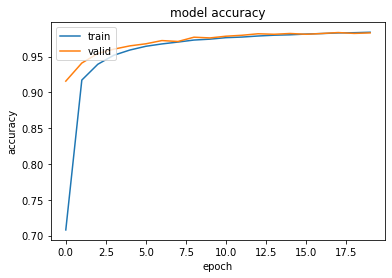

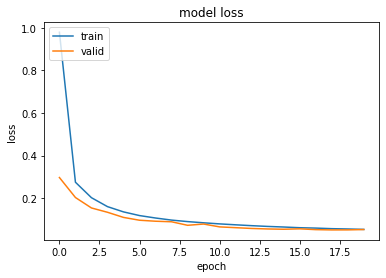

In [41]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [42]:
#Model1'in karmaşıklık matrisi

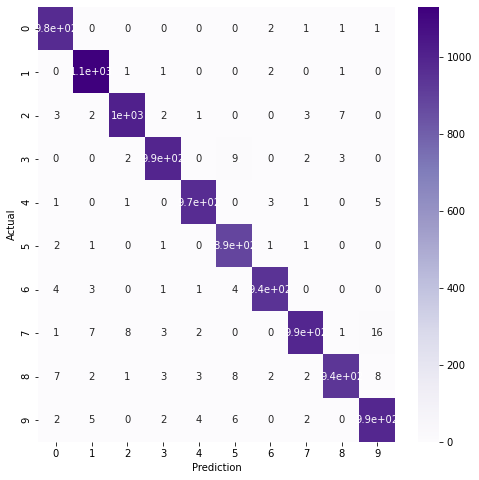

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_test = model.predict(x_test)
y_pred=[]
for i in y_pred_test:
  a=np.argmax(i)
  y_pred.append(a)
y_=[]
for i in y_test:
  a=np.argmax(i)
  y_.append(a)
cm = confusion_matrix(y_,y_pred)
plt.figure(figsize = (8,8))
ax = sns.heatmap(cm, annot=True, xticklabels=["0","1","2","3","4","5","6","7","8","9"], yticklabels=["0","1","2","3","4","5","6","7","8","9"],
                cbar=True,cmap='Purples')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [45]:
#Veri setinden rastgele seçilen verilerin test edilmesi

In [46]:
from keras.models import load_model
model = load_model('my_model1') # kaydedilen modeli çağırdık

(x_train, y_train), (x_test, y_test)  = mnist.load_data()
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255

#test edilen görüntüyü kutu haline almak ve tahmini yazdırmak için method
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    #etrafına kutu çizme
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #görüntüye metin ekleme tahmini ekler
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (255,255,255), 2)
    cv2.imshow(name, expanded_image)

#test veri setinden rastgele 10 tane seçilerek test edilir.
for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    ##Tahmini çizdirme
    res = np.argmax(model.predict(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", str(res), imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [47]:
#Görsellerdeki yazıları tahmin etme

In [4]:
model = load_model('my_model1') # kaydedilen modeli çağırdık

import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

image = cv2.imread(file_path)
#görseli griye çevirme
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", image)
cv2.waitKey(0)

# görseli bulanıklaştır ve sınırlarını çiz
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)


# yazıların etrafına sınır çiz
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#soldan sağa sırala
contours = sorted(contours, key = x_cord_contour, reverse = False)

full_number = []

for c in contours:
    #dikdöörtgen için sınırlaıcı kutu hesaplama
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >=5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2.imshow("ROI", roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Test et
        res = np.argmax(model.predict(roi, 1, verbose = 0)[0])
        full_number.append(str(res))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, str(res), (x , y + 200), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

The number is: 5610


In [49]:
#Emnist balanced veri setini yükleme

In [5]:
balanced_train = pd.read_csv("emnist/emnist-balanced-train.csv")
balanced_test = pd.read_csv("emnist/emnist-balanced-test.csv")
mapp = pd.read_csv("emnist/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)

In [51]:
#Emnist balanced veri seti ile oluşturulan model

In [52]:
#Modelin Eğitilmesi

classes = len(balanced_train['45'].value_counts())

train_x = balanced_train.iloc[:,1:]
train_y = balanced_train.iloc[:,0]

test_x = balanced_test.iloc[:,1:]
test_y = balanced_test.iloc[:,0]

x_train = np.array(train_x) / 255.0
y_train = np.array(train_y)
x_test = np.array(test_x) / 255.0
y_test = np.array(test_y)

x_train.astype('float32')
x_test.astype('float32')

x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print(x_train.shape,x_test.shape)

train_y = np_utils.to_categorical(train_y, classes)
test_y = np_utils.to_categorical(test_y, classes)

train_x = x_train.reshape(-1, 28, 28, 1)
test_x = x_test.reshape(-1, 28, 28, 1)

train_xx, label_x, train_yy, label_y = train_test_split(train_x, train_y,  test_size=0.2, random_state = 42)

model = Sequential()

model.add(layers.Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (28, 28,1)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(.2))
model.add(layers.Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(.2))
model.add(layers.Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(.2))
model.add(layers.Flatten())
model.add(layers.Dense(units = 64,activation = 'relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(units = classes,activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


model_history = model.fit(train_xx, train_yy,epochs = 50,batch_size = 256,verbose = 1,validation_data=(label_x, label_y))



model.save("my_model2")




(112799, 28, 28) (18799, 28, 28)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)    

In [53]:
#modelin test edilmesi

In [54]:
scores = model.evaluate(train_xx,train_yy,batch_size=1)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(test_x,test_y,batch_size=1)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

90239/90239 [==============================] - 269s 3ms/step - loss: 0.1870 - accuracy: 0.9245
Training Accuracy: 92.45%

18799/18799 [==============================] - 63s 3ms/step - loss: 0.3254 - accuracy: 0.8907
Testing Accuracy: 89.07%



In [55]:
#Modelin  grafiğinin çizilmesi

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


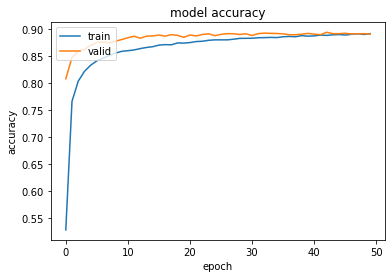

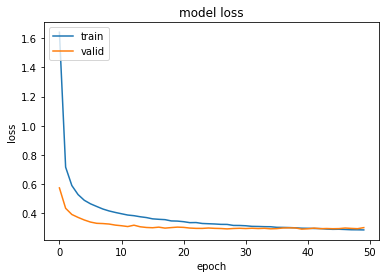

In [56]:
import matplotlib.pyplot as plt

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [57]:
#Modelin karmaşıklık matrisi

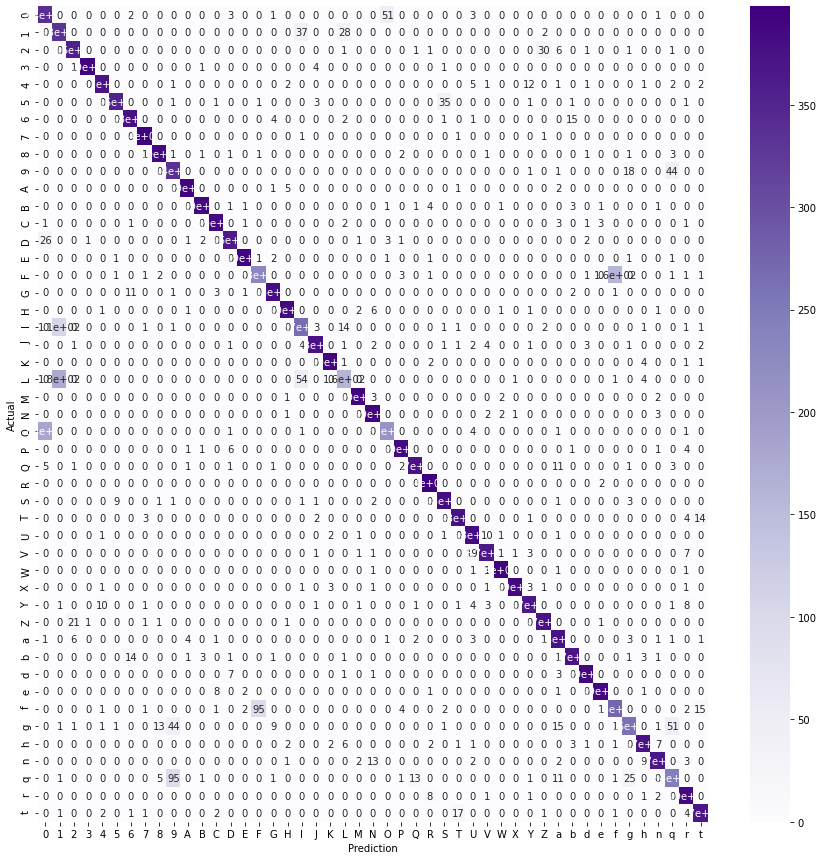

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_test = model.predict(test_x)
y_pred=[]
for i in y_pred_test:
  a=np.argmax(i)
  y_pred.append(a)
y_=[]
for i in test_y:
  a=np.argmax(i)
  y_.append(a)
cm = confusion_matrix(y_,y_pred)
plt.figure(figsize = (15,15))
ax = sns.heatmap(cm, annot=True, xticklabels=["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","a","b","d","e","f","g","h","n","q","r","t"], yticklabels=["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","a","b","d","e","f","g","h","n","q","r","t"],
                cbar=True,cmap='Purples' )
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

plt.show()

In [59]:
y_pred=np.argmax(model.predict(test_x),axis=-1)
from sklearn.metrics import classification_report,confusion_matrix
y_test=np.argmax(test_y,axis=-1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71       400
           1       0.54      0.83      0.65       400
           2       0.92      0.90      0.91       400
           3       0.99      0.98      0.99       400
           4       0.96      0.93      0.94       400
           5       0.97      0.89      0.93       400
           6       0.93      0.94      0.94       400
           7       0.98      0.99      0.98       400
           8       0.95      0.97      0.96       400
           9       0.70      0.84      0.76       400
          10       0.98      0.98      0.98       400
          11       0.98      0.96      0.97       400
          12       0.96      0.97      0.96       400
          13       0.94      0.91      0.92       400
          14       0.98      0.98      0.98       400
          15       0.70      0.57      0.63       400
          16       0.95      0.95      0.95       400
          17       0.97    

In [60]:
#Veri setinden rastgele seçilen verilerin test edilmesi

In [61]:
from keras.models import load_model
model = load_model('my_model2') # kaydedilen modeli çağırdık

balanced_test = pd.read_csv("emnist/emnist-balanced-test.csv")

test_x = balanced_test.iloc[:,1:]
x_test = np.array(test_x) / 255.0
x_test.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28)
test_x = x_test.reshape(-1, 28, 28, 1)


#test edilen görüntüyü kutu haline almak ve tahmini yazdırmak için method
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    #etrafına kutu çizme
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #görüntüye metin ekleme tahmini ekler
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (255,255,255), 2)
    cv2.imshow(name, expanded_image)

#test veri setinden rastgele 10 tane seçilerek test edilir.
for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    ##Tahmini çizdirme
    res = np.argmax(model.predict(input_im, 1, verbose = 0)[0])
    res=chr(mapp[res])
    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [62]:
#Görsellerdeki yazıları tahmin etme

In [17]:
model = load_model('my_model2') # kaydedilen modeli çağırdık
 
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

imag = cv2.imread(file_path)
image=cv2.rotate(imag, cv2.ROTATE_90_COUNTERCLOCKWISE)
#görseli griye çevirme
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", imag)
cv2.waitKey(0)

# görseli bulanıklaştır ve sınırlarını çiz
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)


# yazıların etrafına sınır çiz
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#soldan sağa sırala
contours = sorted(contours, key = x_cord_contour, reverse = True)

full_number = []

mapp = pd.read_csv("emnist/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)


for c in contours:
    #dikdöörtgen için sınırlaıcı kutu hesaplama
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >=5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        roi = roi / 255.0    
        roi=roi.astype('float32')
        roi = roi.reshape(1,28,28,1)
      
        ## Test et
        res = np.argmax(model.predict(roi, 1, verbose = 0)[0])
        res=chr(mapp[res])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(imag, res, (600-y, 300), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", imag)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()
print (''.join(full_number))

XQ
